In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.colors import LogNorm
!pip install skmatter
from skmatter.decomposition import KernelPCovR
from sklearn.kernel_ridge import KernelRidge

In [ ]:
df=pd.read_csv('data_with_features.csv', index_col=0)
df.describe()

,k2,K1,rAC,rcat,kg(473K),kg(673K),kg(873K),pg(473K),pg(673K),pg(873K),reff(Tg=473K),reff(Tg=673K),reff(Tg=873K),r1,r2,shaft_length,theta1,theta2,torsion
count,3.880000e+02,388.000000,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,388.000000,3.880000e+02,3.880000e+02,3.880000e+02,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,1.934044e+07,37.930356,8.957118e+05,4.660473e+05,1.976712e+01,6.091037e+04,5.337219e+06,8.494813e-01,9.643840e-01,0.985403,6.940990e+03,5.983404e+04,4.353715e+05,5.248367,-0.003181,4.358531,180.593628,0.124245,17.829164
std,1.814001e+08,466.250015,8.974441e+06,4.002405e+06,2.699537e+01,7.192393e+04,5.722334e+06,3.421645e-01,1.783563e-01,0.115112,1.318326e+04,7.904006e+05,3.859817e+06,0.126048,0.135689,0.236734,22.714277,9.887670,14.594470
min,2.085212e+02,0.000515,8.443474e+00,8.443473e+00,6.280091e-26,1.124714e-14,1.498201e-08,2.260833e-22,4.048969e-11,0.000054,2.445927e-16,4.380459e-05,8.443473e+00,4.942049,-0.468585,3.226641,98.736425,-47.601531,0.045876
25%,4.391391e+03,0.205611,1.619639e+03,1.619606e+03,5.391173e-02,1.136852e+03,2.734745e+05,1.000000e+00,1.000000e+00,1.000000,7.321085e+02,1.495238e+03,1.602806e+03,5.158486,-0.098084,4.234254,165.391604,-5.234478,6.436564
50%,8.521477e+03,0.920636,3.730133e+03,3.729963e+03,9.948799e+00,4.318654e+04,4.439660e+06,1.000000e+00,1.000000e+00,1.000000,2.604668e+03,3.539427e+03,3.608214e+03,5.240364,0.002838,4.378204,182.086370,0.669964,14.410323
75%,2.941931e+04,4.628069,9.654834e+03,9.653691e+03,3.210362e+01,1.006620e+05,8.552737e+06,1.000000e+00,1.000000e+00,1.000000,6.590219e+03,8.249780e+03,8.764688e+03,5.334934,0.098117,4.527124,196.909354,5.623303,26.424964
max,2.049141e+09,6803.463000,1.459160e+08,5.233622e+07,2.206009e+02,5.705925e+05,4.440641e+07,1.000000e+00,1.000000e+00,1.000000,1.061067e+05,1.547523e+07,5.233622e+07,5.583639,0.323772,4.785942,243.460367,42.619980,86.336008


In [ ]:
df_clean=df.loc[:, ['rcat', 'rAC', 'reff(Tg=673K)', 'kg(673K)', 'r1', 'r2', 'shaft_length', 'theta1', 'theta2', 'torsion']]
df_clean.drop_duplicates(inplace=True)
df_clean.dropna(inplace=True)
df_clean.reset_index(inplace=True, drop=True)

df_clean.describe()

,rcat,rAC,reff(Tg=673K),kg(673K),r1,r2,shaft_length,theta1,theta2,torsion
count,3.880000e+02,3.880000e+02,3.880000e+02,3.880000e+02,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,4.660473e+05,8.957118e+05,5.983404e+04,6.091037e+04,5.248367,-0.003181,4.358531,180.593628,0.124245,17.829164
std,4.002405e+06,8.974441e+06,7.904006e+05,7.192393e+04,0.126048,0.135689,0.236734,22.714277,9.887670,14.594470
min,8.443473e+00,8.443474e+00,4.380459e-05,1.124714e-14,4.942049,-0.468585,3.226641,98.736425,-47.601531,0.045876
25%,1.619606e+03,1.619639e+03,1.495238e+03,1.136852e+03,5.158486,-0.098084,4.234254,165.391604,-5.234478,6.436564
50%,3.729963e+03,3.730133e+03,3.539427e+03,4.318654e+04,5.240364,0.002838,4.378204,182.086370,0.669964,14.410323
75%,9.653691e+03,9.654834e+03,8.249780e+03,1.006620e+05,5.334934,0.098117,4.527124,196.909354,5.623303,26.424964
max,5.233622e+07,1.459160e+08,1.547523e+07,5.705925e+05,5.583639,0.323772,4.785942,243.460367,42.619980,86.336008


### Plain PCA:

In [ ]:
feature_cols=['r1', 'r2', 'shaft_length', 'theta1', 'theta2', 'torsion']
# 'rAC', 'reff(Tg=673K), 'kg(673K)'
target_col='rcat'

X=df_clean[feature_cols].values
y=df_clean[target_col].values
y_log=np.log10(y)

X_scaler=StandardScaler()
X_scaled=X_scaler.fit_transform(X)
y_scaler=StandardScaler()
y_scaled=y_scaler.fit_transform(y_log.reshape(-1, 1))

In [ ]:
pca=PCA()
X_pca=pca.fit_transform(X_scaled)
explained_var=np.cumsum(pca.explained_variance_ratio_)

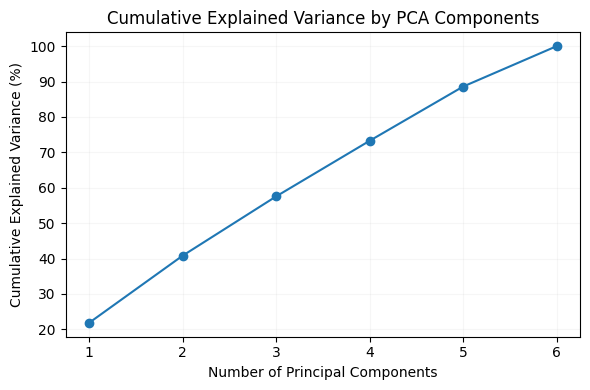

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, len(explained_var)+1), explained_var*100, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

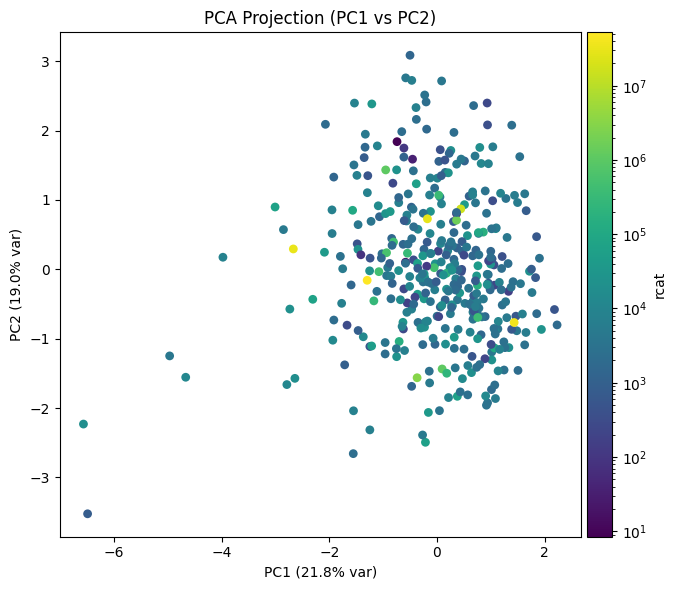

In [ ]:
pc1_var=pca.explained_variance_ratio_[0]*100
pc2_var=pca.explained_variance_ratio_[1]*100

plt.figure(figsize=(7, 6))
sc=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=40, edgecolor='none', norm=LogNorm())
cbar=plt.colorbar(sc, pad=0.01)
cbar.set_label('rcat')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA Projection (PC1 vs PC2)")
plt.tight_layout()
plt.show()

### kernel PCA:

In [ ]:
n_components=len(feature_cols)

kernelpca=KernelPCA(
    n_components=n_components,
    kernel='rbf',
    gamma=1/X_scaled.shape[1],
    fit_inverse_transform=False,
    eigen_solver='auto',
    remove_zero_eig=True)

X_kernelpca=kernelpca.fit_transform(X_scaled)

In [ ]:
lambdas=kernelpca.eigenvalues_
lambda_frac=lambdas/np.sum(lambdas)
lambda_cum=np.cumsum(lambda_frac)

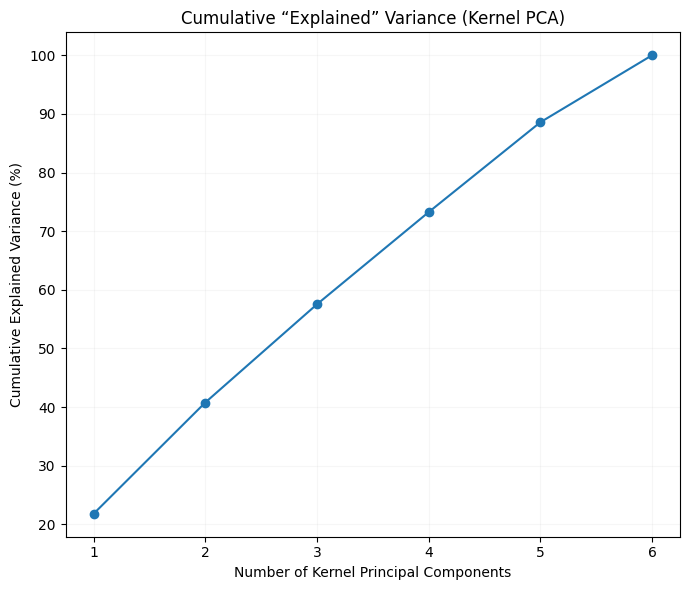

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(np.arange(1, len(explained_var)+1), explained_var*100, marker='o')
plt.xlabel('Number of Kernel Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative “Explained” Variance (Kernel PCA)')
plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

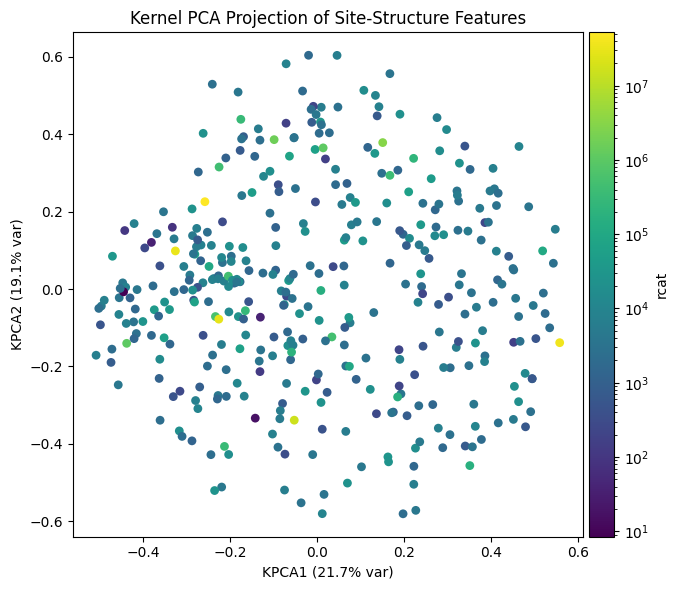

In [ ]:
plt.figure(figsize=(7, 6))
sc=plt.scatter(X_kernelpca[:, 0], X_kernelpca[:, 1], c=y, s=40, edgecolor='none', norm=LogNorm())
cbar=plt.colorbar(sc, pad=0.01)
cbar.set_label('rcat')

plt.xlabel(f'KPCA1 ({lambda_frac[0]*100:.1f}% var)')
plt.ylabel(f'KPCA2 ({lambda_frac[1]*100:.1f}% var)')
plt.title('Kernel PCA Projection of Site-Structure Features')
plt.tight_layout()
plt.show()

output targets: rcat, rac, reff(T=673K), kg(673K) add log scaling of colors thing and logscale rcat. kernel principal covariates regression (KPCovR)

In [ ]:
n_features=X_scaled.shape[1]
gamma_kpcovr=1/n_features

kernel_params={
    "kernel": "rbf",
    "gamma": gamma_kpcovr}

regressor=KernelRidge(
    alpha=1e-10,
    **kernel_params)

In [ ]:
kpcovr=KernelPCovR(
    mixing=0.5,
    n_components=2,
    regressor=regressor,
    **kernel_params)

kpcovr.fit(X_scaled, y_scaled)
T=kpcovr.transform(X_scaled)
y_pred_scaled=kpcovr.predict(X_scaled)
y_pred_log=y_scaler.inverse_transform(y_pred_scaled).ravel()
y_pred=10**y_pred_log

In [ ]:
r2=r2_score(y, y_pred)
mse=mean_squared_error(y, y_pred)
print("KPCovR R^2:", round(r2, 3))
print("KPCovR MSE:", round(mse, 3))

KPCovR R^2: 1.0
KPCovR MSE: 3473049456.643


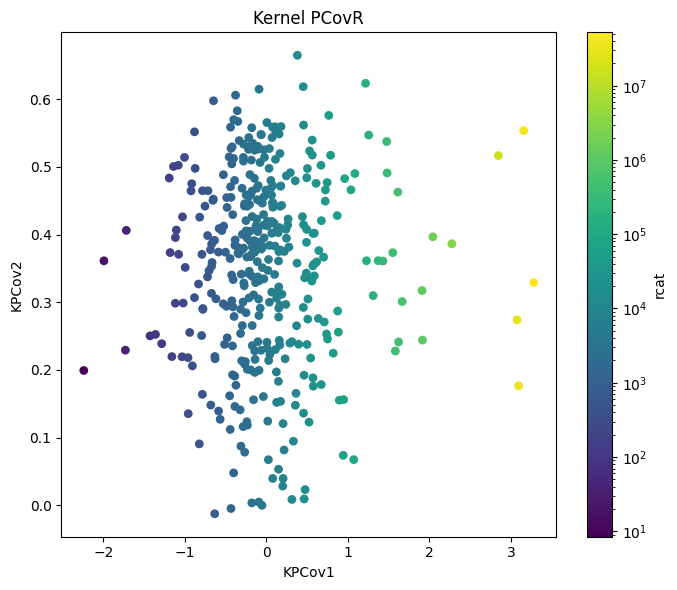

In [ ]:
plt.figure(figsize=(7, 6))
sc=plt.scatter(T[:, 0], T[:, 1], c=y, s=40, edgecolor='none', norm=LogNorm())
plt.colorbar(sc, label='rcat')
plt.xlabel("KPCov1")
plt.ylabel("KPCov2")
plt.title("Kernel PCovR")
plt.tight_layout()
plt.show()